In [1]:
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

In [2]:
path = r"C:\CSV\tripadvisor_hotel_reviews.csv"
df = pd.read_csv(path)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [3]:
import pandas as pd
rd=pd.read_csv(r"C:\CSV\train.csv")
rd.shape
rd.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [4]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [5]:
rd.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id10326,1
Description,38932,38932,The room was kind of clean but had a VERY stro...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [6]:
count = rd.isnull().sum().sort_values(ascending=False)
count

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [7]:
persantage = ((rd.isnull().sum()/len(rd)*100)).sort_values(ascending=False)
missing_data= pd.concat([count,persantage],axis=1,keys=['count','persantage'])
missing_data

,count,persantage
User_ID,0,0.0
Description,0,0.0
Browser_Used,0,0.0
Device_Used,0,0.0
Is_Response,0,0.0


persantage for default
Is_Response
happy        68.12
not happy    31.88
Name: proportion, dtype: float64


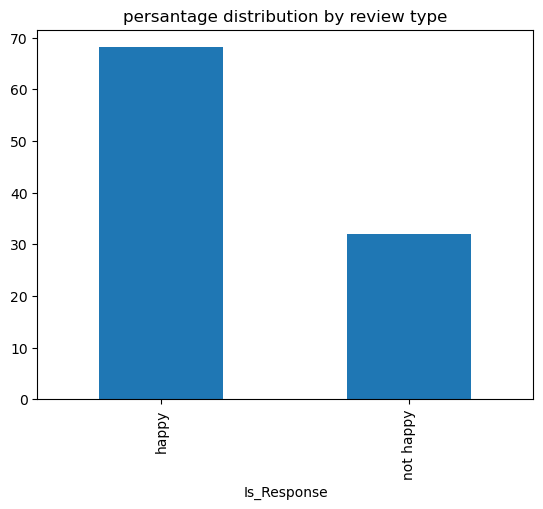

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
print('persantage for default')
print(round(rd.Is_Response.value_counts(normalize=True)*100,2))
round(rd.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('persantage distribution by review type')
plt.show()

In [9]:
rd.drop(columns=['User_ID' , 'Browser_Used' , 'Device_Used'],inplace = True)

In [10]:
import re
import string
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('\[%s]'% re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w','',text)
    return text
cleaned = lambda x : text_clean_1(x)

In [11]:
rd['cleaned_description'] = pd.DataFrame(rd.Description.apply(cleaned))
rd.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april -- - april -...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had - rooms. one was very nice and clearly ...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife & i stayed in this glorious city a whi...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,"wonderful staff, great location, but it was de..."


In [13]:
def text_clean_2(text):
    text = re.sub('[''""]','',text)
    text = re.sub('\n', '',text)
    return text
cleaned2 = lambda x: text_clean_2(x)
    

In [16]:
rd['cleaned_description_new']=pd.DataFrame(rd['cleaned_description'].apply(cleaned2))
rd.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april -- - april -...,i stayed at the crown plaza april -- - april -...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had - rooms. one was very nice and clearly ...,we had - rooms. one was very nice and clearly ...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife & i stayed in this glorious city a whi...,my wife & i stayed in this glorious city a whi...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,"wonderful staff, great location, but it was de...","wonderful staff, great location, but it was de..."


In [17]:
from sklearn.model_selection import train_test_split
ind= rd.cleaned_description_new
dep = rd.Is_Response
 
i_train,i_test,d_train,d_test=train_test_split(ind,dep,test_size=0.1,random_state=225)
print('i_train :',len(i_train))
print ('i_test :',len(i_test))
print('d_train: ',len(d_train))
print ('d_test: ',len(d_test))

i_train : 35038
i_test : 3894
d_train:  35038
d_test:  3894


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
tv = TfidfVectorizer()
lg = LogisticRegression()
from sklearn.pipeline import Pipeline

In [22]:
model = Pipeline([('vectorizer',tv),('classifier',lg)])
model.fit(i_train,d_train)
from sklearn.metrics import confusion_matrix
prediction = model.predict(i_test)
confusion_matrix(prediction,d_test)

array([[2413,  300],
       [ 158, 1023]], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy : ",accuracy_score(prediction, d_test))
print("Precision : ",precision_score(prediction, d_test,average='weighted'))
print("Recall : ",recall_score(prediction, d_test,average='weighted'))

Accuracy :  0.8823831535695943
Precision :  0.8884111404587981
Recall :  0.8823831535695943


In [31]:
example = [" very good "]
result = model.predict(example)

print(result)

['happy']


In [32]:
example= ["very bad"]
result = model.predict(example)
print(result)

['not happy']
